# Support Vector Machines

_Adapted from Chapter 9 of Introduction to Statistical Learning in R_

Agenda Today
- SVM for classification 
    -  Maximal Margin Classifier
    -  Soft Margin
    -  The Kernel trick
    -  Example

## 1. Support Vector Classifier

SVM approach the classification problem in a direct way - __we try and find a plane that separates the classes in the feature space__

If we cannot, we do one of the two things: <br>
- We __soften__ what we mean by "separates" ;
- We __enlarge__ the feature space so that the separation is possible.

__Terminological notes__:
- Support vector machines are sometimes used as a general method that incorporate maximal margin classifier, support vector classifiers etc. However, strictly by definition, support vector machine is a support vector classifier utilized with non-linear kernel. 

"When the support vector classifier is combined with a non-linear kernel such as (9.22), the resulting classifier is known as a support vector machine." -- P366, ISLR

#### 1.1 Hyperplane
- In _p_ dimensional space, the hyperplane is the affine subspace defined as p-1. Mathematically, it is defined as:<br>
<center>β0 +β1X1 +β2X2 +...+βpXp = 0</center>
In this case, the vector β = (β1, β2, .., βn) is the normal vector to the hyperplane. <br>
Such that the points lie on one side is greater than 0, and the other side is less than 0. <br>

Another demonstration or example of hyperplane in a two dimensional space:
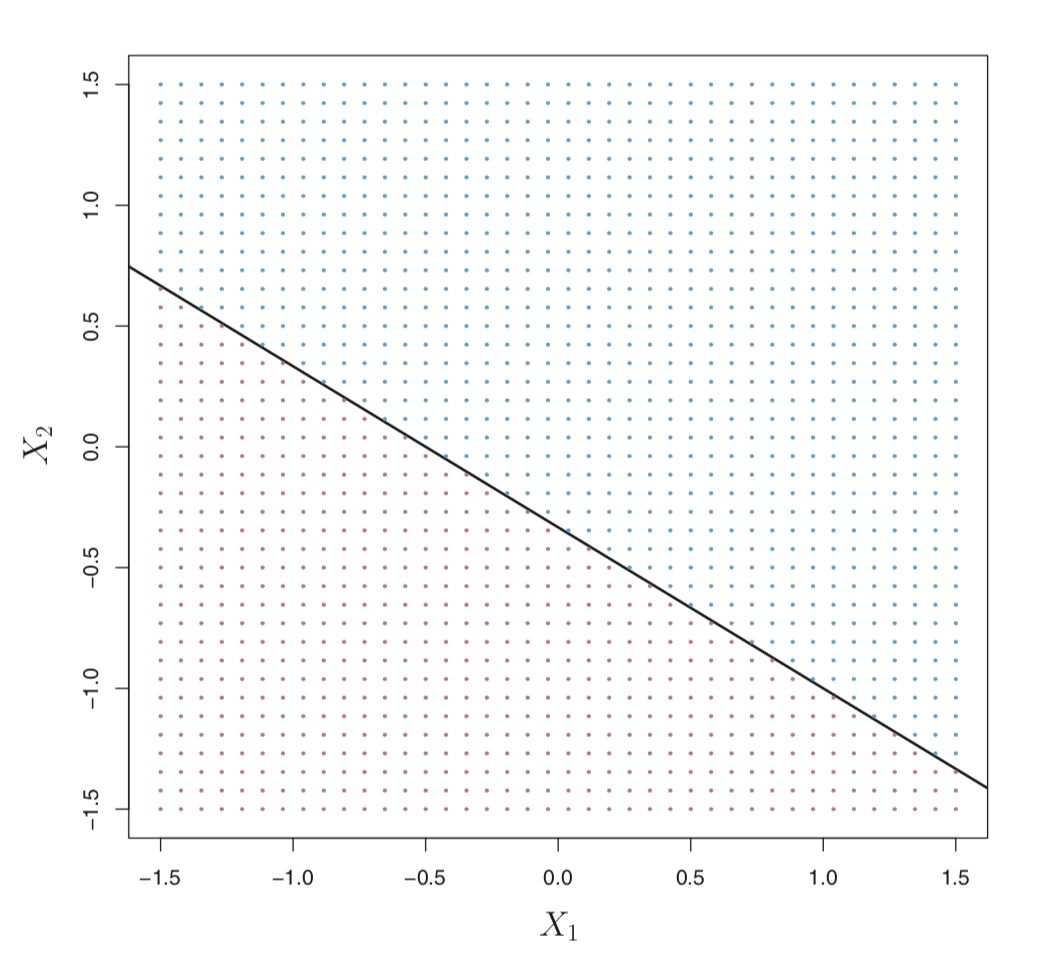

#### 1.2 Maximal Margin Classifier
SVM tackles the problem of classification directly, in the sense that it does not compute a probabilistic model. Instead, it constructs a hyperplane to directly separate the classes. For example: <br>
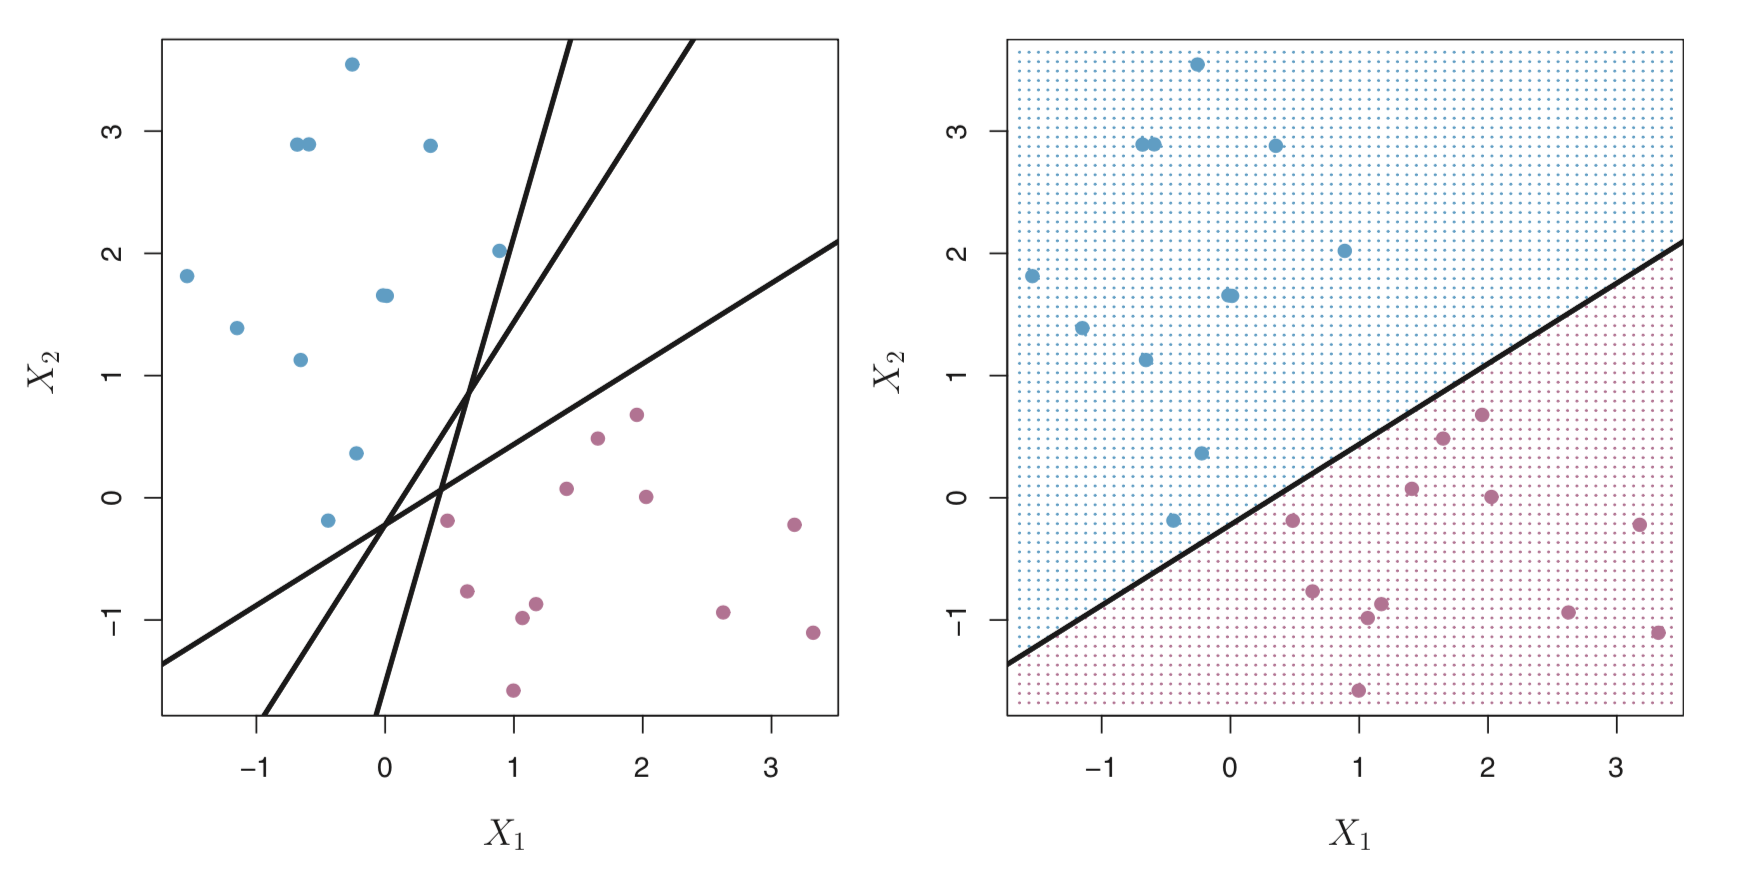
However, the problem with this approach is that we can come up with infinite number of such hyperplanes as we can tilt the line back and forth and it would still serve the same purpose. <br>

__Therefore, we are using the hyperplane such that the it would be the farthest from training observations from either side__. The intuition behind it is that if we have chosen a hyperplane that is far from the training observations, it would be far for the testing observations as well. <br>

The distance between the training observations and the hyperplane is called the _margin_, and the classifier aims to find the 
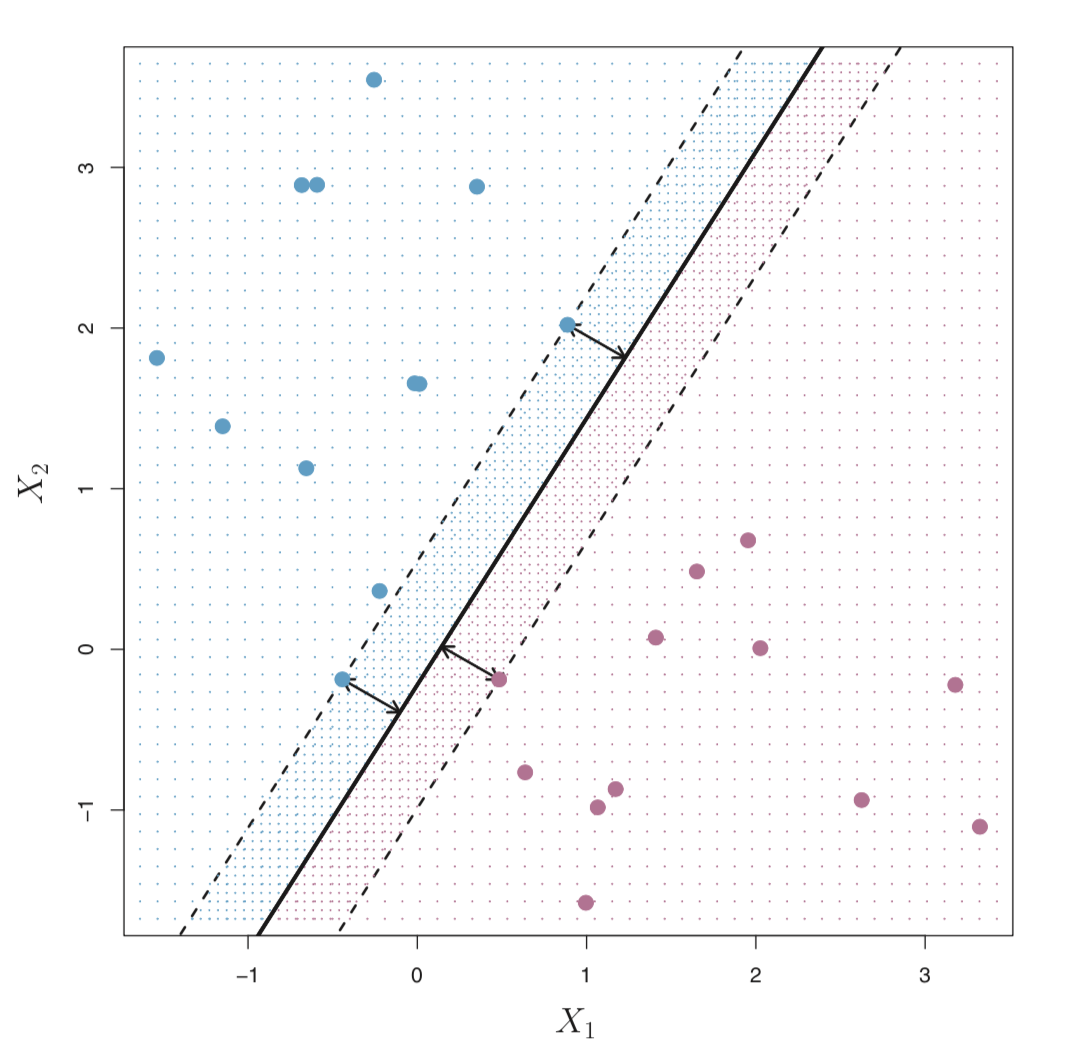

#### 1.3 Constructing and optimizing the maximal margin classifier
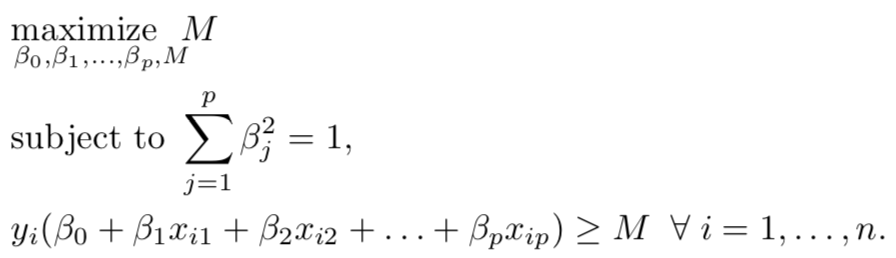

_computation of the above optimization problem can be found of chapter 10 of Elements of Statistical Learning, page 420_

In other words, we want to find parameters values β's such that all the points are at least M distance from the hyperplane and the value of M is maximized. 

## 2. Soft Margin Classifier
Even though the maximal margin classifier sounds like an intuitive idea and not too difficult to optimize for, it might not be desirable under two circumstances:

1. It will be sensitive to individual training observations
2. The algorithm will not converge if the training observations cannot be linearly separated.

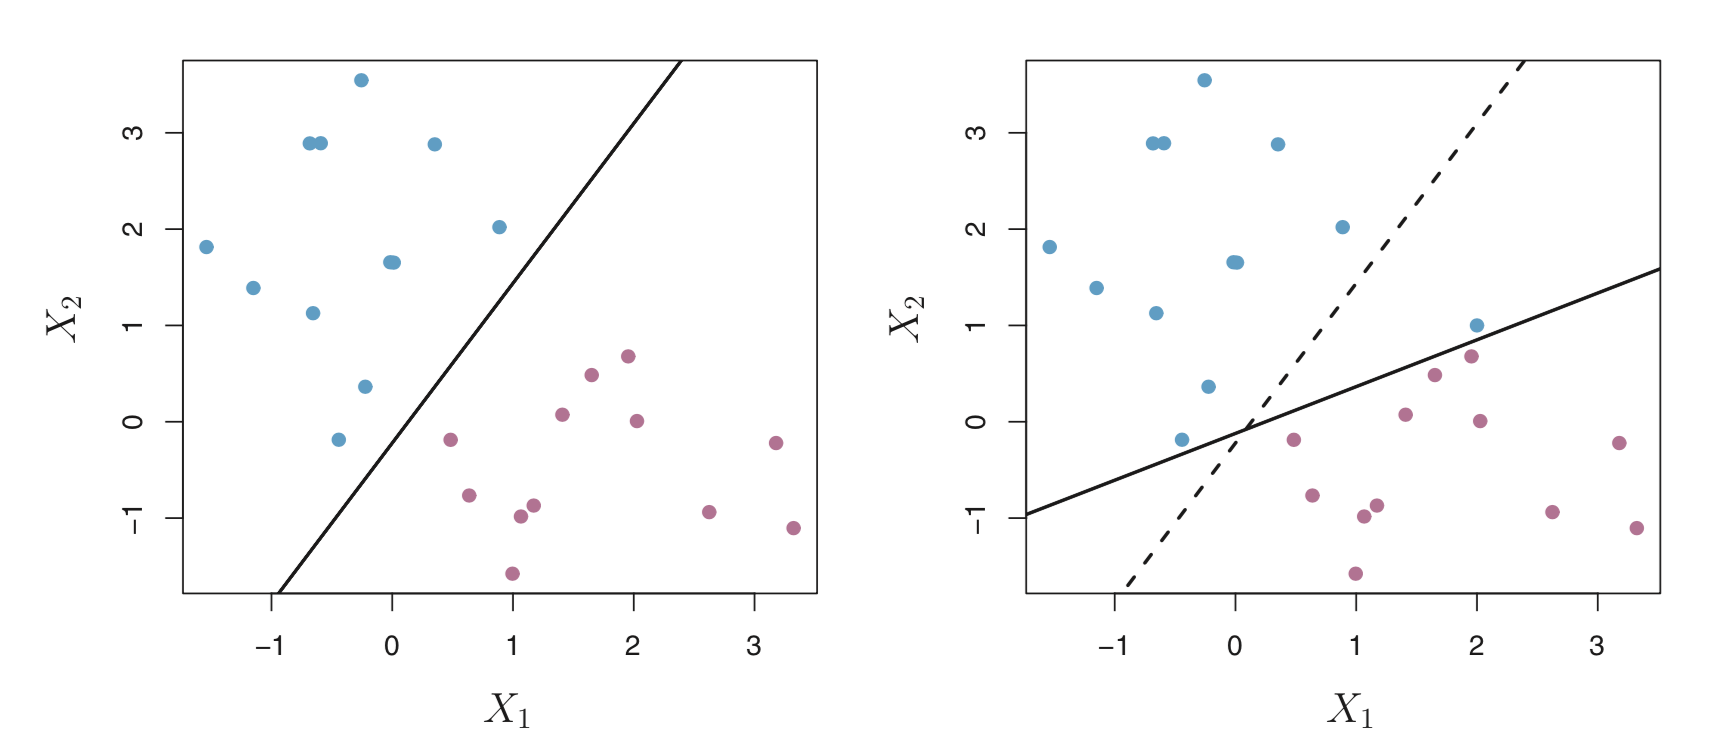
What happens if we cannot come up with a hyperplane that perfectly separates the training observations like the ones above? The first solution is the soft margin classifier, where to loosen up our definition of the margin. 
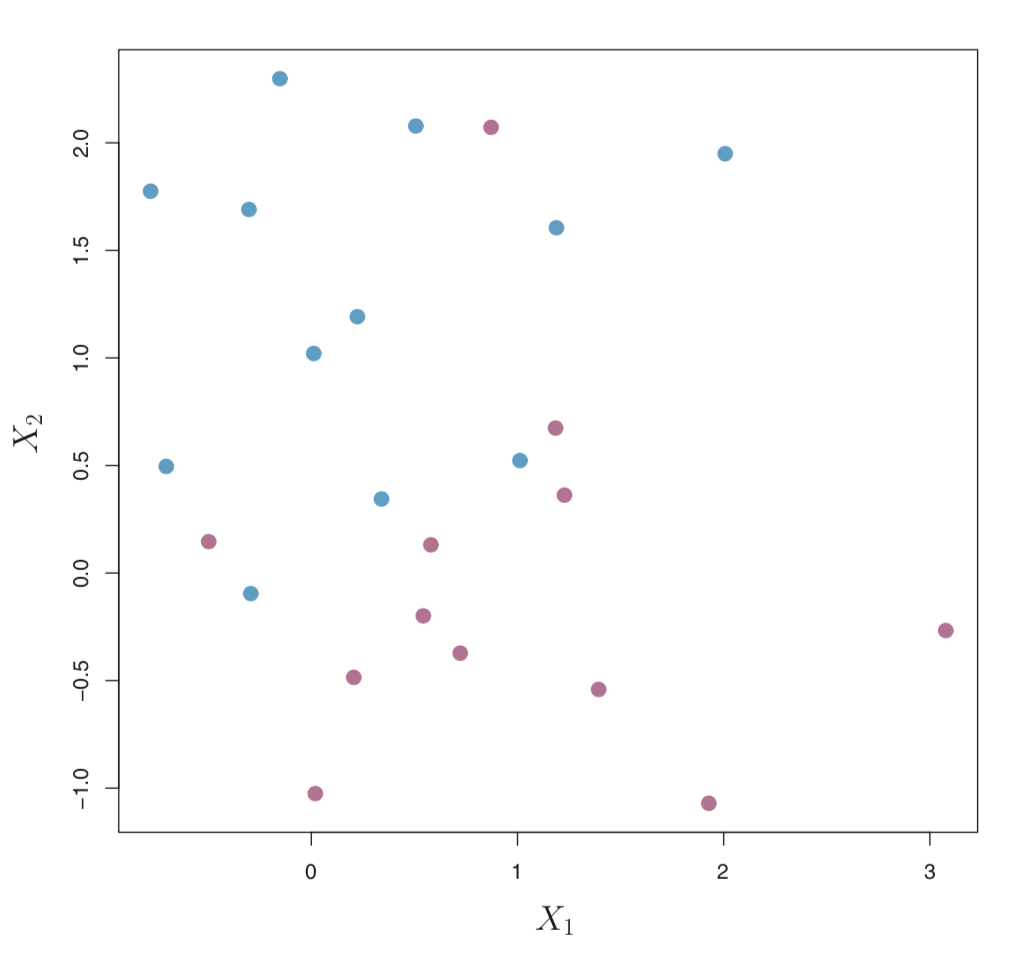
__Rather than seeking the largest possible margin so that every observation is not only on the correct side of the hyperplane but also on the correct side of the margin, we instead allow some observations to be on the incorrect side of the margin, or even on the incorrect side of the hyperplane.__
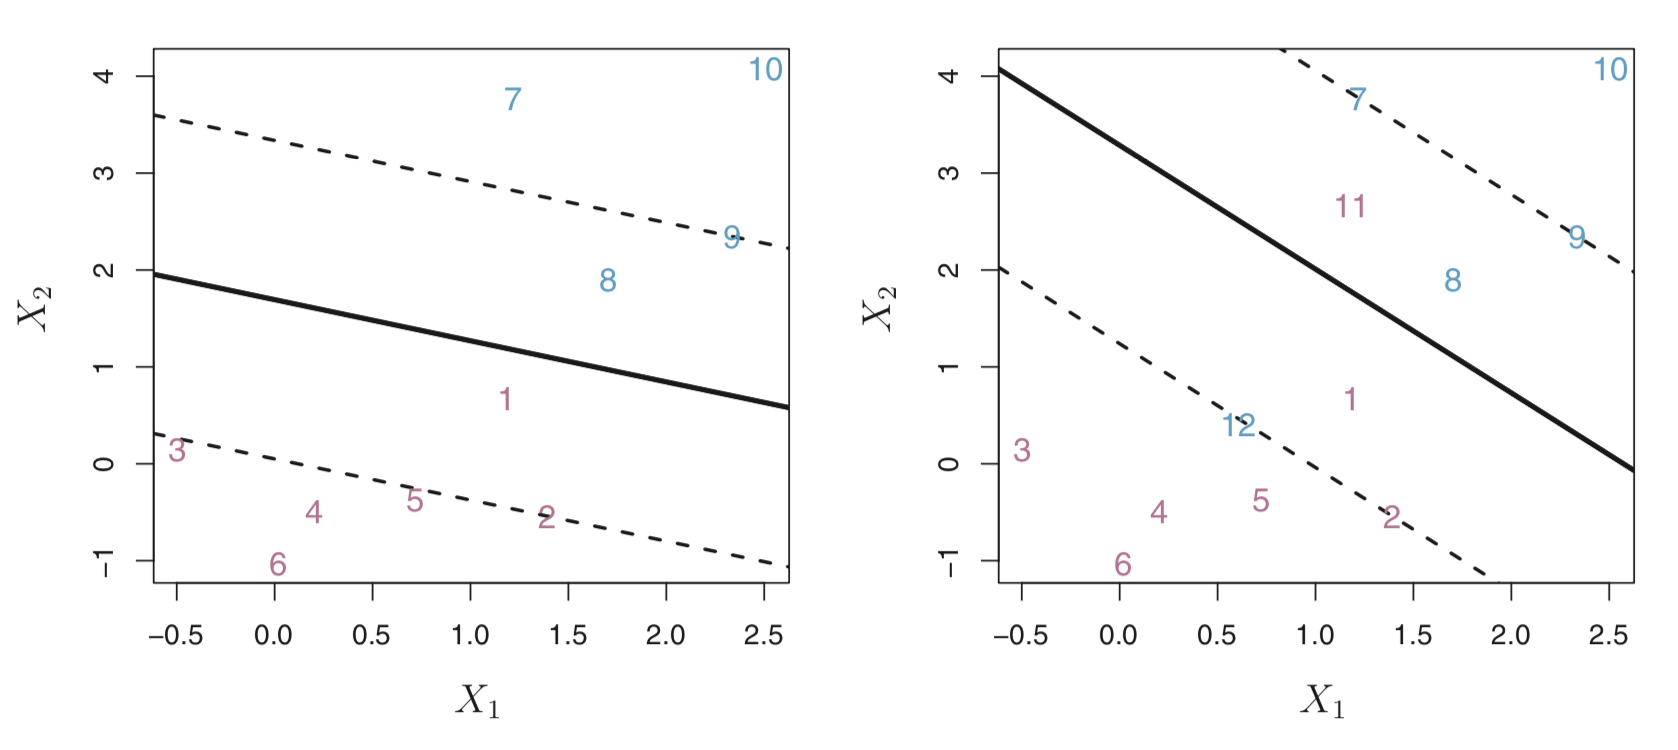

The above process can be formalized as:

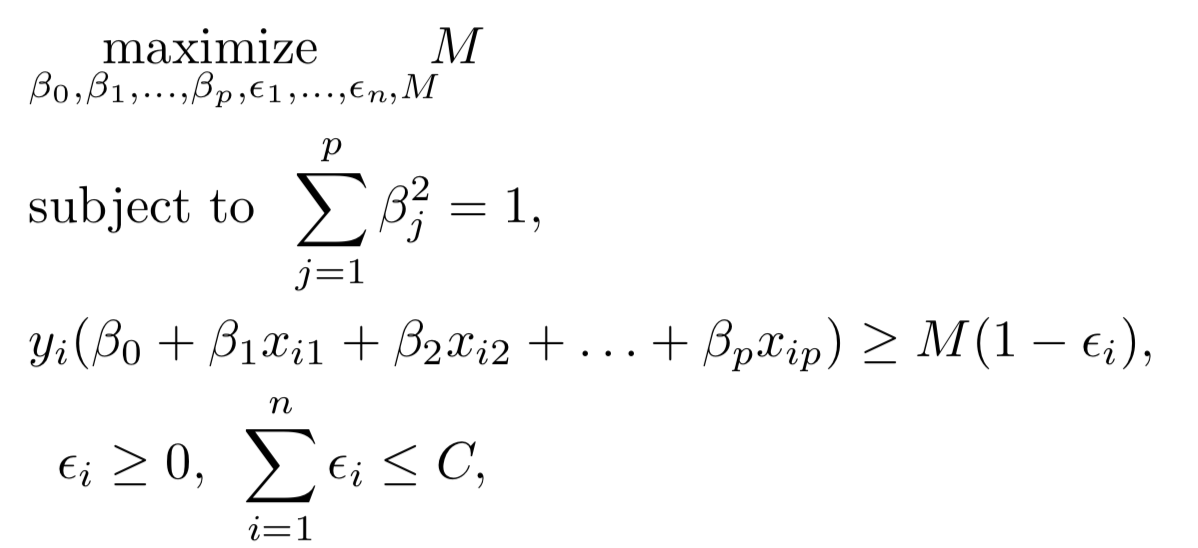
 
In this case, the hyperparameter ε is known as the slack variables, which dictate how many training observations we allow to violate the rule of margins or even the hyperplane. The amount of slack is bounded by C accordingly.<br>

The parameter εi tells us where the ith training observation is located. 
- If εi = 0, then we say the ith training observation is on the correct side of the margin;
- If εi > 0, then we say it has violated the margin
- If εi > 1, then it is on the wrong side of the hyperplane

The value C is the sum of ε across all i training observations. The parameter C controls the bias-variance tradeoff of the statistical technique. A high value of C meaning we are more tolerant of the violation, which in turn might give us a model that has high bias but low variance; however, a low value of C indicates low tolerance of the violation, potentially giving us more variance but less bias. 

__How do we determine the ideal value of C?__
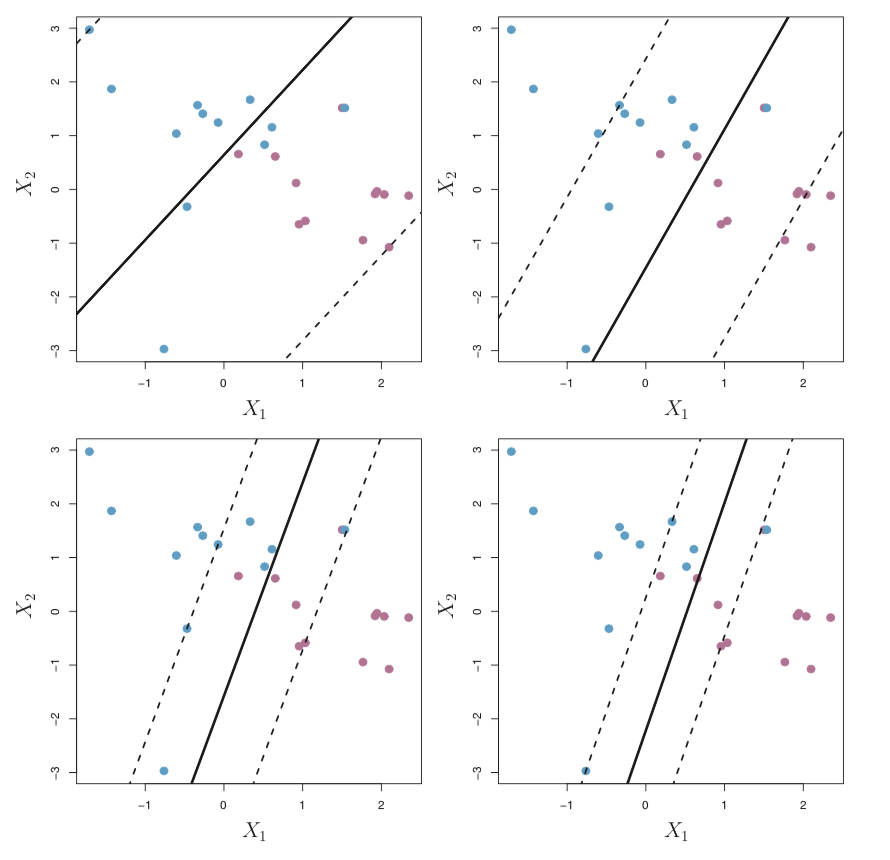

__Note!__<br>
In scikit-learn implementation, c is defined as the inverse. A higher value of c is a smaller regularization or smaller penalty, whereas a lower value of c is a higher penalty.

__Note!__
It is important to point out that in the support vector classfier (or SVM) in general, only the vectors on the margins are used for classification. They are called the __"Support Vectors"__

## 3. Support Vector Machine ("The Kernel Trick")
Sometimes we have training data that are not able to be separated even with softened margin
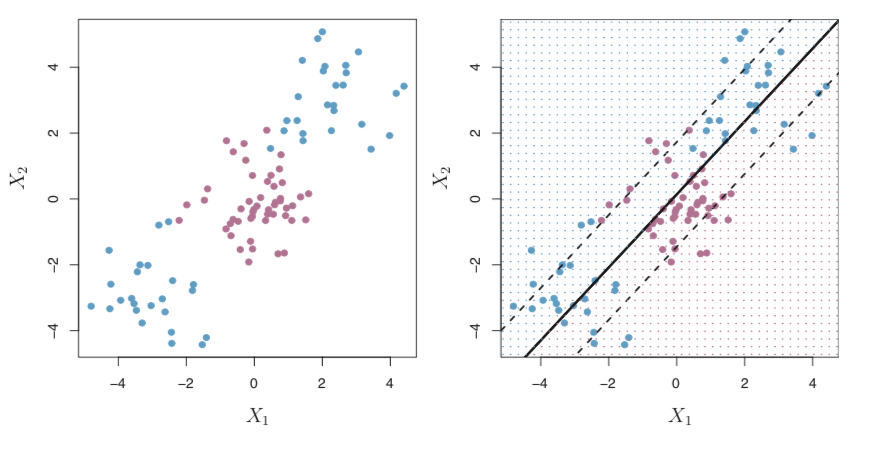
The intuition to find the optimal fit is called feature space expansion:
- First, we __enlarge__ the feature space through the use of kernel
- Fit a support vector classifier in the enlarged space 
- This results in nonlinear decision boundaries in the original space 
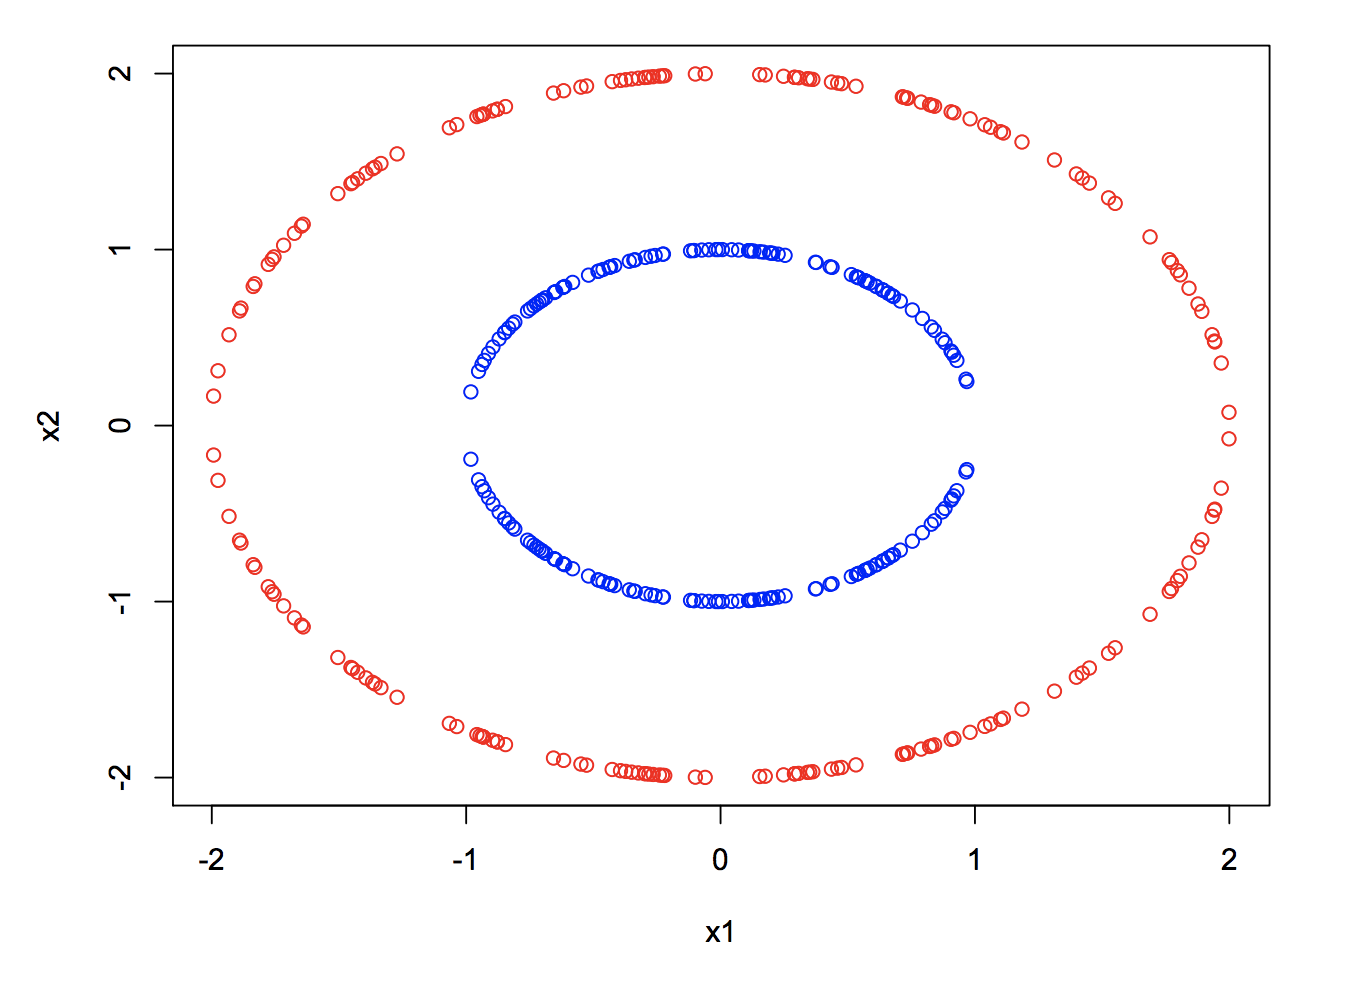
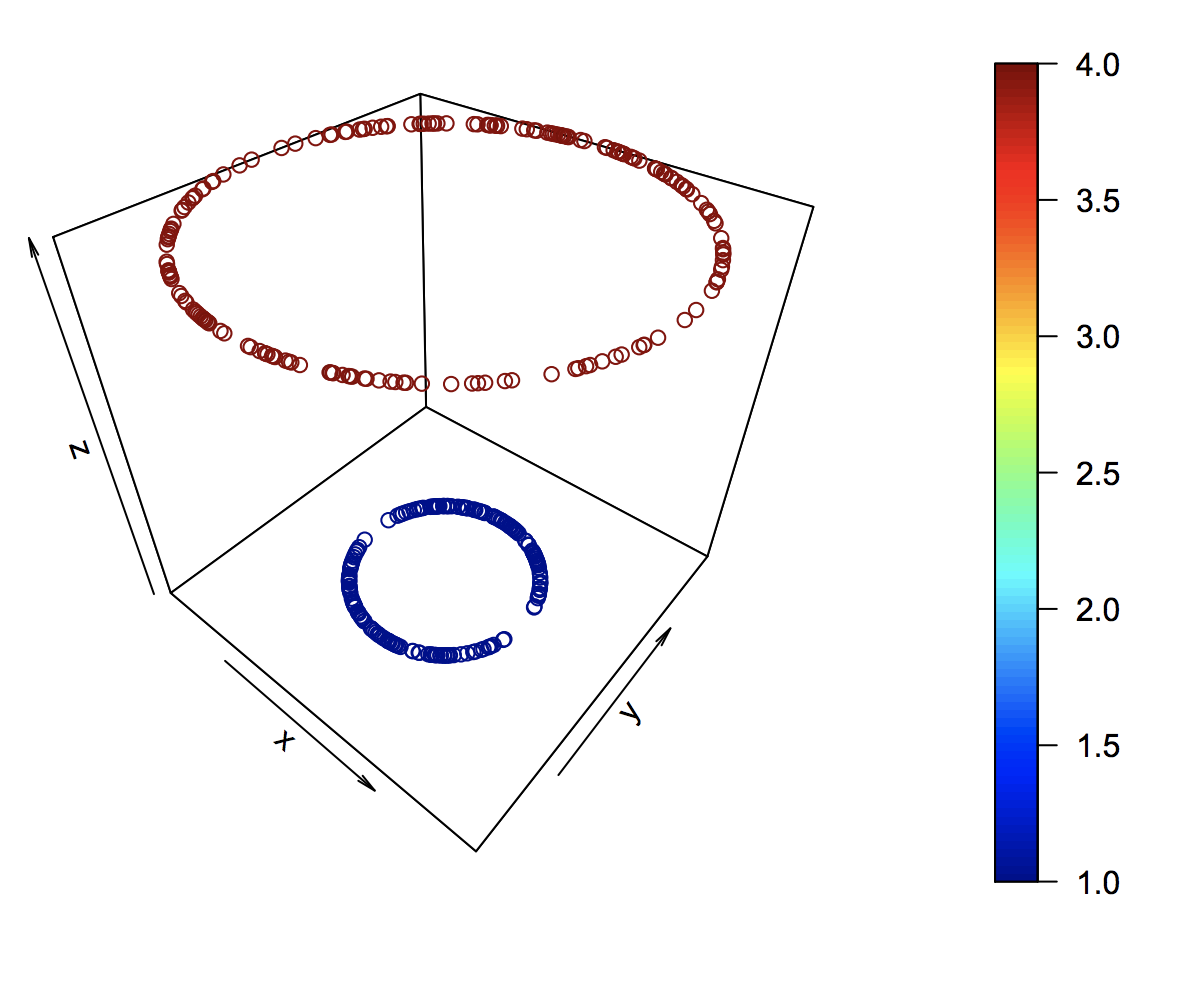
- Why do we know that enlarging the feature space makes the data more linearly separable? Cover's Theorem.


#### 3.1 The role of inner product
- It turns out that in order to efficiently enlarge feature space, using a kernel method is ideal (computionally less expensive)
- To enact the kernel method, we only need the __inner product__ of the two observations, as opposed to the observations themselves
- The inner product of two r-vectors a and b is defined as 
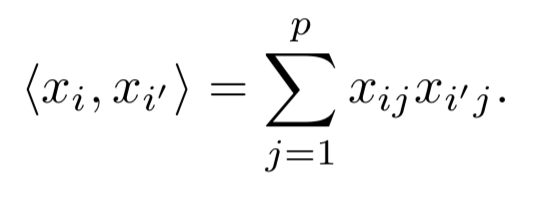
    -  it is the sum of cross products between the two vectors 
- Therefore, the linear support vector classifier can be represented as :
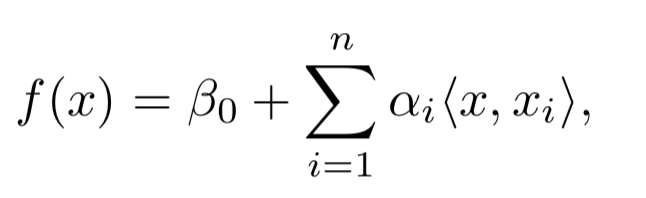
    -  where there are n parameters αi, i = 1, . . . , n, one per training observation. To estimate the parameters α1 ,...,αi and β , all we need are the pairwise inner product between all the n points in the dataset. 
- Notice that in the above formula, in order to evaluate the function f(x), we need to compute the inner product between the new point x and each of the training points xi. However, it turns out that αi is nonzero only for the support vectors in the solution—that is, if a training observation is not a support vector, then its αi equals zero. So if S is the collection of indices of these support points, we can rewrite any solution function of the form as
    -  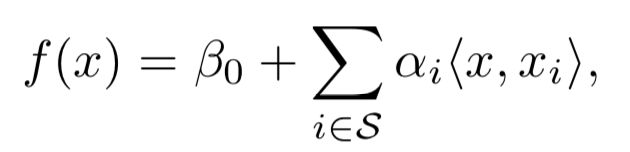
        - is known as the support set of indices i such that αi > 0 <br>

<br>__Bottom line : in representing the linear classifier f(x), and in computing
its coefficients, all we need are inner products__
   

#### 3.2 Kernel Function 
Now suppose that every time the inner product appears in the representation, or in a calculation of the solution for the support vector classifier, we replace it with a generalization of the inner product of the form:
- 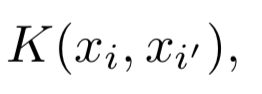
where K is some function that we will refer to as a kernel. A kernel is a function that quantifies the __similarity__ of two observations. For instance, we could simply take<br>
- 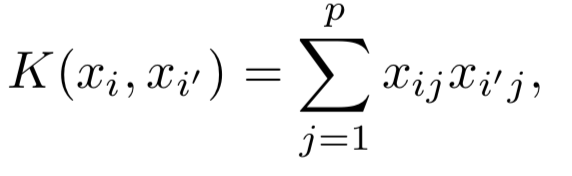
- This is known as the linear kernel

#### 3.3 Different types of Kernels 
- The Radial (rbf) Kernel
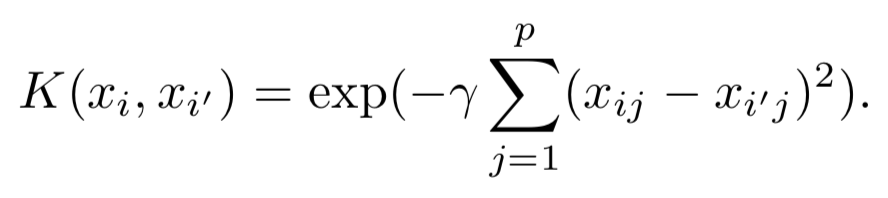
- The Polynomial Kernel 
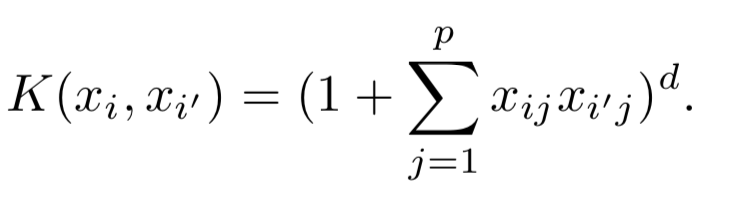

# 4. Implementation & Performance comparison

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  

In [7]:
bankdata = pd.read_csv('data_banknote_authentication.csv', header = None)
bankdata.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
# our data doesn't have header, so we will manually add that on 
headers = ["Variance","Skewness", "Curtosis","Entropy","Class"]
bankdata.columns = headers

In [9]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [11]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = svclassifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[142   2]
 [  2 129]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       144
          1       0.98      0.98      0.98       131

avg / total       0.99      0.99      0.99       275

The accuracy score is 0.9854545454545455


# Conclusions
- SVM is very effective
- However, it is not highly interpretable
- Optimization is hard to understand 
- Performs really well on high dimensional dataset with low amount of observations

